<a href="https://colab.research.google.com/github/tatianabarbone/ticket-prices/blob/main/ACL_sunday_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ticket data for SUNDAY ONLY passes.

In [1]:
import pandas as pd
df = pd.read_csv('sunday.csv')
df

,date,time,min price,num tickets left
0,10/5/21,20:45,91.91,341
1,10/5/21,21:15,92.92,339
2,10/5/21,21:45,92.92,337
3,10/6/21,7:55,90.90,295
4,10/6/21,8:27,90.90,295
...,...,...,...,...
209,10/10/21,16:40,44.00,53
210,10/10/21,17:10,44.00,43
211,10/10/21,17:40,49.50,15
212,10/10/21,18:10,40.00,13


To get a better idea of the distribution of the minimum ticket prices, we'll use the describe function to show the 5-number summary.

In [3]:
import numpy as np

df['min price'].describe()

count    214.000000
mean      91.700935
std       11.516199
min       40.000000
25%       90.000000
50%       94.000000
75%       99.000000
max      109.780000
Name: min price, dtype: float64

This box-and-whisker plot shows the spread of the minimum ticket price data.

Text(0.5, 1.0, 'SUNDAY ONLY Minimum Ticket Price')

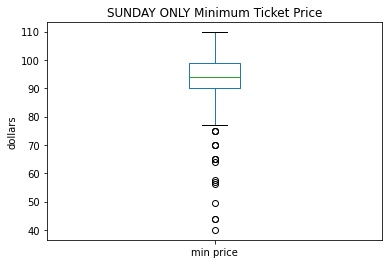

In [4]:
ax = df['min price'].plot.box()
ax.set_ylabel('dollars')
ax.set_title("SUNDAY ONLY Minimum Ticket Price")

We've got...quite a few outliers!

When was the best time to buy a ticket?

In [5]:
min_data = df[df['min price'] == df['min price'].min()]
min_data

,date,time,min price,num tickets left
212,10/10/21,18:10,40.0,13


In [6]:
first_min = min_data.iloc[0]
first_min

date                10/10/21
time                   18:10
min price                 40
num tickets left          13
Name: 212, dtype: object

In a more human-readable format:

In [8]:
print("The lowest selling price for a SUNDAY ONLY ticket from 10/5 to 10/10 was on", 
      first_min['date'], "at", first_min['time'], "for $", first_min['min price'], "when there were", first_min['num tickets left'], "tickets left.")

The lowest selling price for a SUNDAY ONLY ticket from 10/5 to 10/10 was on 10/10/21 at 18:10 for $ 40.0 when there were 13 tickets left.


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


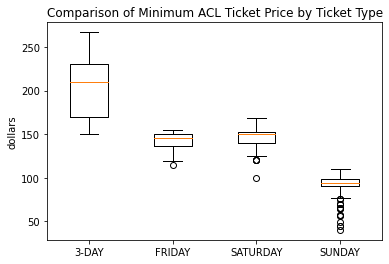

In [31]:
import matplotlib.pyplot as plt

three_day_data = pd.read_csv('3day.csv')["min price"]
friday_data = pd.read_csv('friday.csv')["min price"]
saturday_data = pd.read_csv('saturday.csv')["min price"]
sunday_data = df['min price']

data = (three_day_data, friday_data, saturday_data, sunday_data)
labels = ('3-DAY', 'FRIDAY', 'SATURDAY', 'SUNDAY')

plt.boxplot(data)
plt.xticks(np.arange(len(labels))+1,labels)
plt.title("Comparison of Minimum ACL Ticket Price by Ticket Type")
plt.ylabel("dollars")
plt.show()
